![Imgur](https://i.imgur.com/5pXzCIu.png)

# Data Science va Sun'iy Intellekt Praktikum

## 6-MODUL. Deep Learning
## III-qism

# Deep Learning faqat rasmlarni klassifikatsiyalash uchun emas

#### Kutubxonalarni o'rnatib olamiz

Bizga kerak bo'ladi:

 - `fastai==2.5.3` versiyasi
 - `torch==1.10.0+cu111` versiyasi

Eslatma: Kurs yozilgan vaqtda yuqoridagi versiyalardan foydalanilgan.

In [ ]:
!pip install fastai==2.5.3

Kutubxonalarni tekshirib olish

In [ ]:
# kutubxonalarni yuklab olish
import torch

import fastai

# versiyalarini tekshirish
print(torch.__version__)
print(fastai.__version__)

1.10.0+cu111
2.5.3


## Semantic Segmentation

### O'zi yurar avtomabillar uchun juda ham muhim bo'lgan rasmdagi turli xil obyektlarni ajrata olish (`semantic segmentation`) texnologiyasini modelini qurib ko'ramiz. Ya'ni modelimiz rasmdagi turli xil obyeklarni ajratib ularni turli xil ranglarda ko'rsatadi.

Buning uchun biz `Semantic object classes in video: A high-definition ground truth database` ilmiy maqolada qo'llanilgan datasetdan foydalanamiz.

### Yanada yaxshiroq tasavvurga ega bo'lish uchun quyidagi rasmga e'tibor bering.

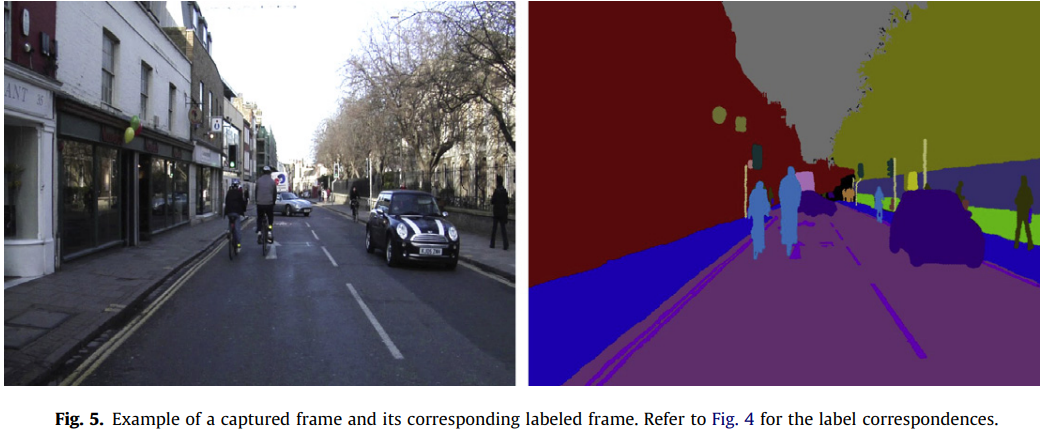

In [ ]:
from fastai.vision.all import *
import numpy as np

path = untar_data(URLs.CAMVID_TINY)


# label getter funksiya
def label_getter(file):
  return path/'labels'/f'{file.stem}_P{file.suffix}'

# dataloaders
dls = SegmentationDataLoaders.from_label_func(path, bs=8, fnames=get_image_files(path/'images'),
                                              label_func= label_getter, codes=np.loadtxt(path/'codes.txt', dtype=str))
#  fine-tuning
learn = unet_learner(dls, resnet34)
learn.fine_tune(12)

/usr/local/lib/python3.7/dist-packages/torch/_tensor.py:1051: UserWarning: __floordiv__ is deprecated, and its behavior will change in a future version of pytorch. It currently rounds toward 0 (like the 'trunc' function NOT 'floor'). This results in incorrect rounding for negative values. To keep the current behavior, use torch.div(a, b, rounding_mode='trunc'), or for actual floor division, use torch.div(a, b, rounding_mode='floor').
  ret = func(*args, **kwargs)
Downloading: "https://download.pytorch.org/models/resnet34-b627a593.pth" to /root/.cache/torch/hub/checkpoints/resnet34-b627a593.pth


  0%|          | 0.00/83.3M [00:00<?, ?B/s]

epoch,train_loss,valid_loss,time
0,3.340232,2.638013,00:13


epoch,train_loss,valid_loss,time
0,2.057234,1.655495,00:05
1,1.676627,1.466134,00:04
2,1.472661,1.302511,00:04
3,1.329957,1.256630,00:04
4,1.204042,0.990345,00:04
5,1.080546,0.944130,00:04
6,0.981438,0.929824,00:04
7,0.899195,0.898520,00:04
8,0.824934,0.843409,00:04
9,0.761431,0.844058,00:05


/usr/local/lib/python3.7/dist-packages/torch/_tensor.py:1051: UserWarning: __floordiv__ is deprecated, and its behavior will change in a future version of pytorch. It currently rounds toward 0 (like the 'trunc' function NOT 'floor'). This results in incorrect rounding for negative values. To keep the current behavior, use torch.div(a, b, rounding_mode='trunc'), or for actual floor division, use torch.div(a, b, rounding_mode='floor').
  ret = func(*args, **kwargs)


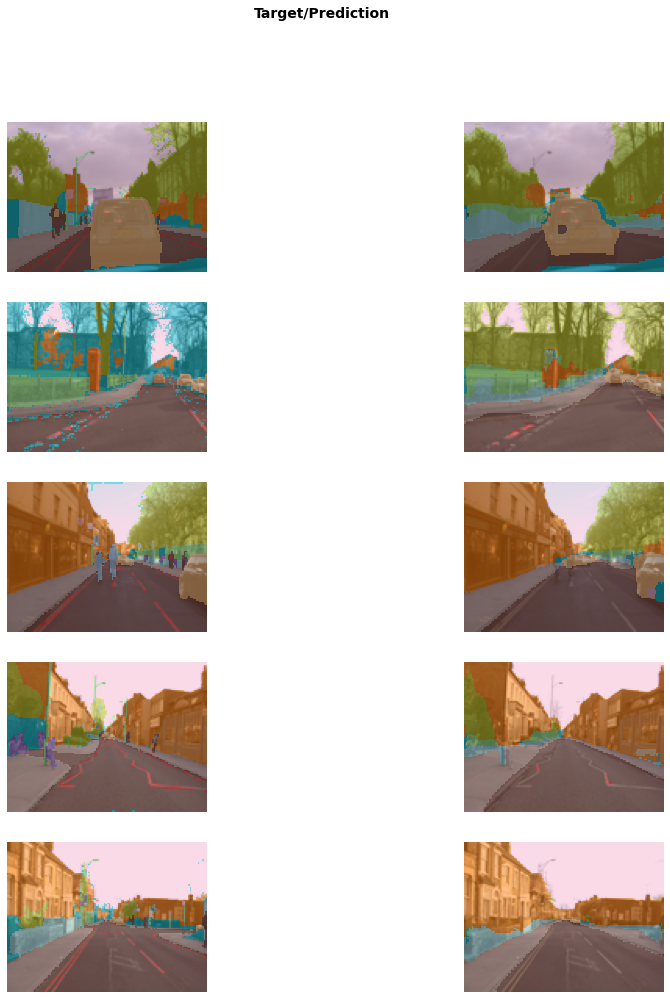

In [ ]:
learn.show_results(max_n=5, figsize=(15, 16))

## Natural Language Processing (NLP)

### Navbatdagi misollimiz bu NLP(Natural Language Processing)ga yo'naltirilgan. Bu soha hozirda juda jadal rivojalanib borayotgan soha hisoblanadi. NLP o'z ichiga matnlar ishlab chiqa olish (generate), izohlarni tahlil qilish, gapdagi so'zlarni sinflash va h.k amallarni qamrab oladi.

### Hozir quradigan modelimiz ham [IMDb Review](https://ai.stanford.edu/~amaas/data/sentiment/) datasetda berilgan izohlardan kelib chiqgan holda, u izohning `ijobiy(positive)` yoki `salbiy(negative)` izoh ekanligini aniqlay oladi.

In [ ]:
# kutubxonalarni yuklab olish
import torch
import fastai

# versiyalarini tekshirish
print(torch.__version__)
print(fastai.__version__)

1.10.0+cu111
2.5.3


In [ ]:
from fastai.text.all import *

# dataset
path = untar_data(URLs.IMDB)

# dataloaders
dls = TextDataLoaders.from_folder(path, train='train', valid='test')

# fine-tune
learn = text_classifier_learner(dls, AWD_LSTM, drop_mult=0.5, metrics=accuracy)
learn.fine_tune(4, 0.01)

epoch,train_loss,valid_loss,accuracy,time
0,0.460479,0.400948,0.818920,09:44


epoch,train_loss,valid_loss,accuracy,time
0,0.302473,0.244873,0.899360,18:47
1,0.238072,0.200182,0.923280,18:50
2,0.192131,0.186204,0.927480,18:46
3,0.152822,0.189814,0.929760,18:47


In [ ]:
learn.predict("I hate that movie")

('neg', TensorText(0), TensorText([0.7432, 0.2568]))

## Tabular data va Tabular model

### `Tabular data`: Tuzilishi jadval ko'rinishida bo'lgan ma'lumotlarni `tabular data` deb aytish mumkin.

### `Tabular model`: Bu jadvalning bir ustunini boshqa ustunidagi ma'lumotlarga tayanib o'qitilgan(trained) modelni tushinish mumkin.

Dataset: [Adult data set](https://archive.ics.uci.edu/ml/datasets/adult)

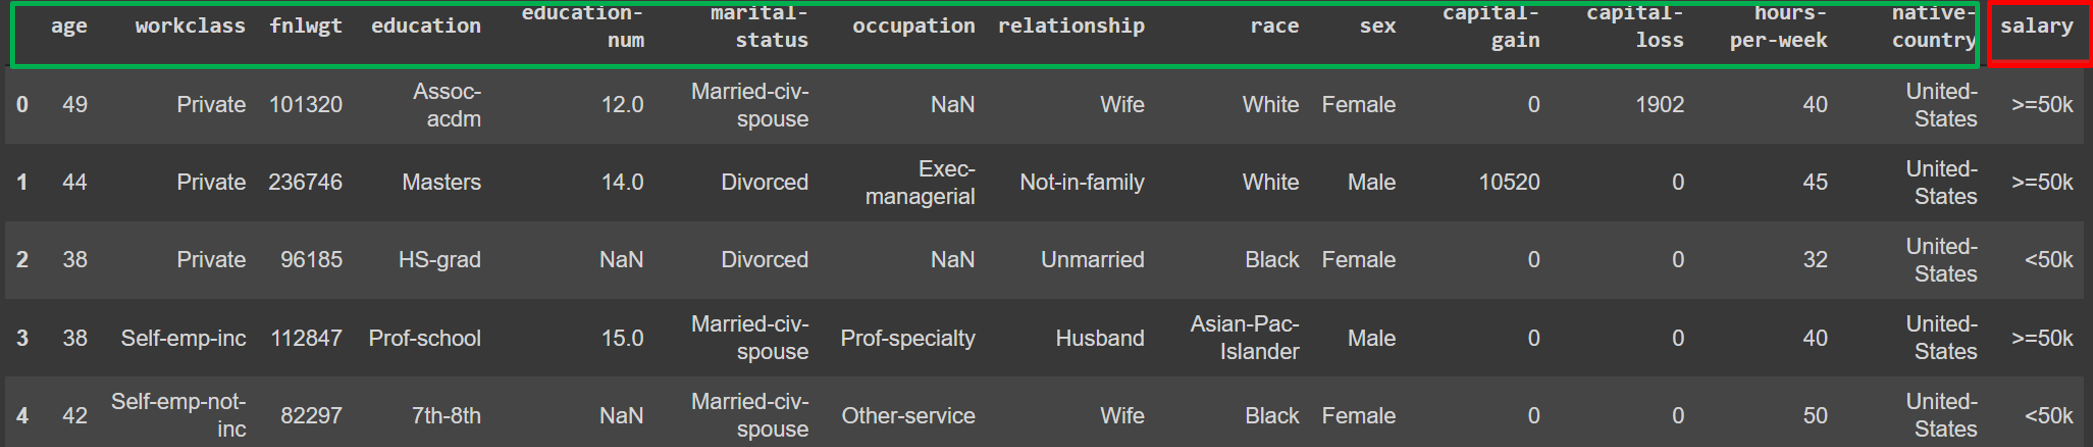

In [ ]:
from fastai.tabular.all import *

# dataset
path = untar_data(URLs.ADULT_SAMPLE)

# dataloaders
dls = TabularDataLoaders.from_csv(path/'adult.csv', path=path, bs=64, y_names='salary', skipinitialspace=False,
                                  cat_names=['workclass', 'education', 'marital-status', 'occupation', 'relationship', 'race', 'sex'],
                                  cont_names= ['age', 'fnlwgt', 'education-num', 'capital-gain', 'capital-loss', 'hours-per-week'],
                                  procs = [Categorify, FillMissing, Normalize])

# o'qitish (train)
learn = tabular_learner(dls, metrics=accuracy)
# fit_one_cycle --> bu fine_tune dan farqli o'laroq, yangidan arxitektura tuzib o'qitadi
learn.fit_one_cycle(4)

epoch,train_loss,valid_loss,accuracy,time
0,0.361069,0.346018,0.833692,00:05
1,0.324340,0.332135,0.845362,00:05
2,0.317583,0.324122,0.847973,00:05
3,0.316566,0.325543,0.847052,00:05


In [ ]:
import pandas as pd

# loading data set into dataframe
df = pd.read_csv(path/'adult.csv')
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,49,Private,101320,Assoc-acdm,12.0,Married-civ-spouse,NaN,Wife,White,Female,0,1902,40,United-States,>=50k
1,44,Private,236746,Masters,14.0,Divorced,Exec-managerial,Not-in-family,White,Male,10520,0,45,United-States,>=50k
2,38,Private,96185,HS-grad,NaN,Divorced,NaN,Unmarried,Black,Female,0,0,32,United-States,<50k
3,38,Self-emp-inc,112847,Prof-school,15.0,Married-civ-spouse,Prof-specialty,Husband,Asian-Pac-Islander,Male,0,0,40,United-States,>=50k
4,42,Self-emp-not-inc,82297,7th-8th,NaN,Married-civ-spouse,Other-service,Wife,Black,Female,0,0,50,United-States,<50k


In [ ]:
# test
row, pred, probs = learn.predict(df.iloc[4])
pred.item(), probs

(0, tensor([0.8206, 0.1794]))

Xulosa: Agar yillik maosh 50k dan kichik bo'lsa, unda `0` klass, va aksincha 50k ga teng yoki yuqori bo'ladigan bo'lsa `1` klass ekanligini bashorat qila oladigan model qurdik.




## Tabular model yordamida `Loan decision`

### Ma'lumotlarga qarab kimlarga kredit ajratish haqida qaror qabul qilish.


### Dataset: [Loan Default](https://www.kaggle.com/yasserh/loan-default-dataset)

In [ ]:
from fastai.tabular.all import *


# path
path = Path('.')


# dataloaders
dls = TabularDataLoaders.from_csv(path/'Loan_Default.csv', path=path, bs=64, y_names='Status',
                                  cat_names=['loan_limit', 'Gender', 'approv_in_adv', 'loan_type', 'loan_purpose', 'Credit_Worthiness', 'open_credit', 'business_or_commercial', 'interest_only', 'lump_sum_payment', 'co-applicant_credit_type', 'submission_of_application', 'Region'],
                                  cont_names=['loan_amount', 'rate_of_interest', 'Interest_rate_spread', 'Upfront_charges', 'term', 'property_value', 'income', 'Credit_Score',  'LTV', 'dtir1'],
                                  procs=[Categorify, FillMissing, Normalize])

# train
learn = tabular_learner(dls, metrics=accuracy)

learn.fit_one_cycle(2)

epoch,train_loss,valid_loss,accuracy,time
0,0.003900,0.000824,0.756440,00:41
1,0.003029,0.000753,0.756440,00:34


In [ ]:
learn.show_results(max_n=64)

,loan_limit,Gender,approv_in_adv,loan_type,loan_purpose,Credit_Worthiness,open_credit,business_or_commercial,interest_only,lump_sum_payment,co-applicant_credit_type,submission_of_application,Region,rate_of_interest_na,Interest_rate_spread_na,Upfront_charges_na,term_na,property_value_na,income_na,LTV_na,dtir1_na,loan_amount,rate_of_interest,Interest_rate_spread,Upfront_charges,term,property_value,income,Credit_Score,LTV,dtir1,Status,Status_pred
0,1.0,2.0,1.0,1.0,2.0,1.0,1.0,2.0,2.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,-1.058655,1.211781,-0.079465,-0.772020,0.426481,-0.908532,-0.406052,-1.500364,0.109000,-0.094404,0.0,0.001959
1,1.0,2.0,1.0,1.0,3.0,1.0,1.0,2.0,2.0,2.0,2.0,1.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.410850,-0.834892,-0.190255,-1.093209,-1.627013,0.140822,0.439945,-0.784767,0.075954,-0.818827,0.0,0.005599
2,1.0,3.0,1.0,2.0,3.0,1.0,1.0,1.0,2.0,1.0,1.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,-1.004229,-0.834892,0.844310,-0.104868,0.426481,-0.879383,-0.700725,-0.655443,0.145339,1.147463,0.0,0.013435
3,1.0,2.0,1.0,1.0,3.0,1.0,1.0,2.0,2.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,-0.133411,-1.346560,-0.149213,-0.517634,-1.627013,0.374011,-0.330007,1.249941,-0.684790,0.423041,0.0,-0.000245
4,1.0,3.0,1.0,1.0,4.0,1.0,1.0,2.0,2.0,2.0,1.0,1.0,4.0,2.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,-0.187837,-0.087857,-0.086193,-0.164810,0.426481,-0.296409,-0.291985,-0.551983,0.101151,1.147463,1.0,0.981387
5,1.0,1.0,1.0,2.0,1.0,1.0,1.0,1.0,2.0,2.0,1.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,-1.330785,-0.087857,1.024849,-0.286507,0.426481,-1.170870,-0.757759,-1.672797,0.742220,2.078864,0.0,-0.000031
6,2.0,3.0,1.0,1.0,1.0,1.0,1.0,2.0,2.0,2.0,1.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.138720,1.467615,-0.330425,-1.093209,-0.189567,-0.034071,0.031205,-0.431280,0.047355,0.940486,0.0,0.006807
7,1.0,2.0,1.0,1.0,1.0,1.0,1.0,2.0,2.0,2.0,2.0,1.0,4.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.390521,-0.087857,0.116773,-1.093209,0.426481,0.374011,0.145272,-0.922714,0.642811,0.112574,0.0,0.001917
8,1.0,2.0,1.0,2.0,1.0,1.0,1.0,1.0,2.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,-0.405541,-1.090726,0.676331,-1.093209,0.426481,-0.675342,-0.520119,0.594696,0.775130,1.561419,0.0,0.000357
9,1.0,4.0,1.0,1.0,3.0,1.0,1.0,2.0,2.0,2.0,1.0,2.0,4.0,2.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,-1.113081,-0.087857,-0.086193,-0.164810,0.426481,-0.995978,-0.539130,-0.724416,0.366495,0.319552,1.0,0.976310
